<a href="https://colab.research.google.com/github/VISWASKUMAR-S/Appliances_Energy_prediction_ML_Model_Regression/blob/main/Bgc_Gen_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Almabetter/BGC Internship/10-K finanical details.csv')
df.head()


,Company name,Year,Total_Revenue,Net_Income,Total_Assets,Total_libalities,Cash flow FromOperation(In million dollars),Unnamed: 7
0,Microsoft,2024,"2,45,122",88136.0,"5,12,163","2,43,686","1,18,548",NaN
1,Microsoft,2023,"2,11,195",72361.0,"4,11,976","2,05,753","87,582",NaN
2,Microsoft,2022,"1,98,270",72738.0,"3,64,840","1,98,298","89,035",NaN
3,Microsoft,2021,"1,43,015",61271.0,"3,33,779","1,91,791","76,740",NaN
4,Tesla,2024,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 8 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Company name                                 12 non-null     object 
 1   Year                                         12 non-null     int64  
 2   Total_Revenue                                10 non-null     object 
 3   Net_Income                                   10 non-null     float64
 4   Total_Assets                                 10 non-null     object 
 5   Total_libalities                             10 non-null     object 
 6   Cash flow FromOperation(In million dollars)  10 non-null     object 
 7   Unnamed: 7                                   0 non-null      float64
dtypes: float64(2), int64(1), object(5)
memory usage: 896.0+ bytes


In [ ]:
df.columns

Index(['Company name', 'Year', 'Total_Revenue', 'Net_Income', 'Total_Assets',
       'Total_libalities', 'Cash flow FromOperation(In million dollars)',
       'Unnamed: 7'],
      dtype='object')

In [ ]:
df.rename(columns={'Unnamed: 7': 'None'},inplace=True)


In [ ]:
df.drop(columns=['None'],inplace = True)

In [ ]:
df.dropna(inplace=True)
df

,Company name,Year,Total_Revenue,Net_Income,Total_Assets,Total_libalities,Cash flow FromOperation(In million dollars)
0,Microsoft,2024,"2,45,122",88136.0,"5,12,163","2,43,686","1,18,548"
1,Microsoft,2023,"2,11,195",72361.0,"4,11,976","2,05,753","87,582"
2,Microsoft,2022,"1,98,270",72738.0,"3,64,840","1,98,298","89,035"
3,Microsoft,2021,"1,43,015",61271.0,"3,33,779","1,91,791","76,740"
5,Tesla,2023,"96,773",14974.0,"1,06,618","43,009","8,769"
6,Tesla,2022,"81,462",12567.0,"82,338","36,440","14,724"
7,Tesla,2021,"53,823",-5644.0,"62,131","30,548","11,497"
9,Apple,2023,"8,061",96995.0,"3,52,583","2,90,437","1,10,543"
10,Apple,2022,"7,912",99803.0,"3,52,755","3,02,083","1,22,151"
11,Apple,2021,"6,700",94680.0,"3,52,002","2,87,912","1,04,038"


In [ ]:
col_tochange = ['Total_Assets','Total_libalities', 'Cash flow FromOperation(In million dollars)']
for i in col_tochange:
  df[i] = df[i].str.replace(',','') # removed the extra () from str and inplace=True from replace
  df[i] = df[i].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 0 to 11
Data columns (total 7 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Company name                                 10 non-null     object 
 1   Year                                         10 non-null     int64  
 2   Total_Revenue                                10 non-null     object 
 3   Net_Income                                   10 non-null     float64
 4   Total_Assets                                 10 non-null     int64  
 5   Total_libalities                             10 non-null     int64  
 6   Cash flow FromOperation(In million dollars)  10 non-null     int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 640.0+ bytes


In [ ]:
df['Total_Revenue'] = df['Total_Revenue'].str.replace(',','').astype(int) # remove commas before converting to int
df['Net_Income'] = df['Net_Income'].astype(int)

In [ ]:
df

,Company name,Year,Total_Revenue,Net_Income,Total_Assets,Total_libalities,Cash flow FromOperation(In million dollars)
0,Microsoft,2024,245122,88136,512163,243686,118548
1,Microsoft,2023,211195,72361,411976,205753,87582
2,Microsoft,2022,198270,72738,364840,198298,89035
3,Microsoft,2021,143015,61271,333779,191791,76740
5,Tesla,2023,96773,14974,106618,43009,8769
6,Tesla,2022,81462,12567,82338,36440,14724
7,Tesla,2021,53823,-5644,62131,30548,11497
9,Apple,2023,8061,96995,352583,290437,110543
10,Apple,2022,7912,99803,352755,302083,122151
11,Apple,2021,6700,94680,352002,287912,104038


In [ ]:
df['Revenue Growth (%)'] = df.groupby(['Company name'])['Total_Revenue'].pct_change(-1) * 100
df['Net Income Growth (%)'] = df.groupby(['Company name'])['Net_Income'].pct_change(-1) * 100

In [ ]:
df['Total_Assets_Growth (%)'] = df.groupby(['Company name'])['Total_Assets'].pct_change(-1) * 100
df['Total_libalities_Growth (%)'] = df.groupby(['Company name'])['Total_libalities'].pct_change(-1) * 100
df['Cash flow FromOperation(In million dollars)_Growth (%)'] = df.groupby(['Company name'])['Cash flow FromOperation(In million dollars)'].pct_change(-1) * 100


In [ ]:
df.loc[1, 'Net Income Growth (%)'] = ((df.loc[1, 'Net_Income'] - df.loc[0, 'Net_Income']) / abs(df.loc[0, 'Net_Income'])) * 100
df['Net Income Growth (%)'] = df['Net Income Growth (%)'].round(2)

In [ ]:
# Rounding of the percentage change to two demials
df = df.round(2)

In [ ]:
df

,Company name,Year,Total_Revenue,Net_Income,Total_Assets,Total_libalities,Cash flow FromOperation(In million dollars),Revenue Growth (%),Net Income Growth (%),Total_Assets_Growth (%),Total_libalities_Growth (%),Cash flow FromOperation(In million dollars)_Growth (%)
0,Microsoft,2024,245122,88136,512163,243686,118548,16.06,21.80,24.32,18.44,35.36
1,Microsoft,2023,211195,72361,411976,205753,87582,6.52,-17.90,12.92,3.76,-1.63
2,Microsoft,2022,198270,72738,364840,198298,89035,38.64,18.72,9.31,3.39,16.02
3,Microsoft,2021,143015,61271,333779,191791,76740,NaN,NaN,NaN,NaN,NaN
5,Tesla,2023,96773,14974,106618,43009,8769,18.80,19.15,29.49,18.03,-40.44
6,Tesla,2022,81462,12567,82338,36440,14724,51.35,-322.66,32.52,19.29,28.07
7,Tesla,2021,53823,-5644,62131,30548,11497,NaN,NaN,NaN,NaN,NaN
9,Apple,2023,8061,96995,352583,290437,110543,1.88,-2.81,-0.05,-3.86,-9.50
10,Apple,2022,7912,99803,352755,302083,122151,18.09,5.41,0.21,4.92,17.41
11,Apple,2021,6700,94680,352002,287912,104038,NaN,NaN,NaN,NaN,NaN


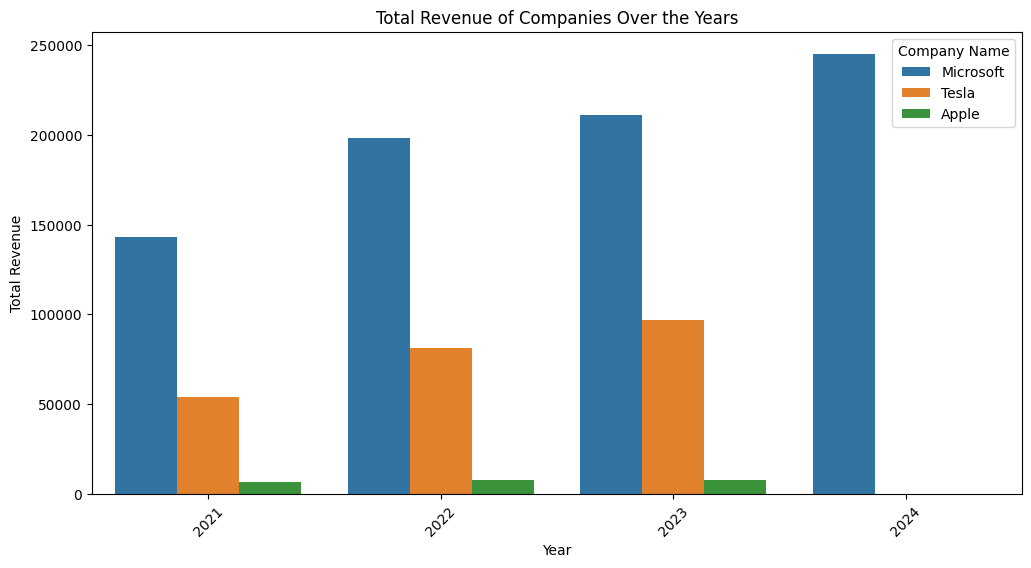

In [ ]:
#Total_revenue over the years

plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Total_Revenue', hue='Company name', data=df)
plt.title('Total Revenue of Companies Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.legend(title='Company Name')
plt.show()


In [ ]:
#Implementing chatbot
!pip install flask pandas nltk


In [ ]:
def simple_chatbot(user_query):
   if user_query == "What is the total revenue?":
       return "The total revenue is [amount]."
   elif user_query == "How has net income changed over the last year?":
       return "The net income has [increased/decreased] by [amount] over the last year."
   # Add more conditions for other predefined queries
   else:
       return "Sorry, I can only provide information on predefined queries."

KeyError: 'Revenue'

In [ ]:
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt')

# Simple function to parse the user's question and determine what they want
def parse_question(question):
    tokens = nltk.word_tokenize(question.lower())
    if 'revenue' in tokens:
        return 'Revenue'
    elif 'net income' in tokens:
        return 'Net Income'
    elif 'operating income' in tokens:
        return 'Operating Income'
    else:
        return 'Unknown'

# Example user question
question = "What was the revenue in 2022?"
metric = parse_question(question)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
def get_financial_info(year, metric):
    if metric not in df.columns:
        return "Sorry, I don't have information on that metric."

    try:
        value = df.loc[df['Year'] == year, metric].values[0]
        return f"The {metric.lower()} in {year} was {value}."
    except IndexError:
        return "Sorry, I don't have data for that year."

# Example interaction
year = 2022
response = get_financial_info(year, metric)
print(response)


Sorry, I don't have information on that metric.


In [ ]:
from flask import Flask, request, jsonify

app = Flask(__name__)

@app.route('/chatbot', methods=['POST'])
def chatbot():
    user_input = request.json.get('message')
    year = int(request.json.get('year'))

    metric = parse_question(user_input)
    response = get_financial_info(year, metric)

    return jsonify({'response': response})

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [ ]:
import pandas as pd
def simple_chatbot(company_name, user_query):
    latest_year = df['Year'].max()
    previous_year = latest_year - 1

    # Filter data for the given company
    company_data = df[df['Company name'] == company_name]

    if user_query == "What is the total revenue?":
        revenue = company_data.loc[company_data['Year'] == latest_year, 'Total_Revenue'].values[0]
        return f"The total revenue for {company_name} in {latest_year} is {revenue}."

    elif user_query == "How has net income changed over the last year?":
        net_income_latest = company_data.loc[company_data['Year'] == latest_year, 'Net_Income'].values[0]
        net_income_previous = company_data.loc[company_data['Year'] == previous_year, 'Net_Income'].values[0]
        change = net_income_latest - net_income_previous
        change_type = "increased" if change > 0 else "decreased"
        return f"The net income for {company_name} has {change_type} by {abs(change)} over the last year ({previous_year} to {latest_year})."

    elif user_query == "What is the total assets?":
        assets = company_data.loc[company_data['Year'] == latest_year, 'Total_Assets'].values[0]
        return f"The total assets for {company_name} in {latest_year} are {assets}."

    elif user_query == "What is the total liabilities?":
        liabilities = company_data.loc[company_data['Year'] == latest_year, 'Total_liabilities'].values[0]
        return f"The total liabilities for {company_name} in {latest_year} are {liabilities}."

    elif user_query == "What is the cash flow from operation?":
        cash_flow = company_data.loc[company_data['Year'] == latest_year, 'Cash flow From Operation (In million dollars)']
        return f"The cash flow from operation for {company_name} in {latest_year} is {cash_flow} million dollars."

    else:
        return "Sorry, I can only provide information on predefined queries."

# Example interactions
print(simple_chatbot("Company A", "What is the total revenue?"))
print(simple_chatbot("Company A", "How has net income changed over the last year?"))
print(simple_chatbot("Company A", "What is the total assets?"))
print(simple_chatbot("Company B", "What is the cash flow from operation?"))


IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
import pandas as pd

def simple_chatbot(company_name, user_query):
    # Ensure the dataframe is not empty after filtering
    company_data = df[df['Company name'] == company_name]
    if company_data.empty:
        return "No data found for this company."

    latest_year = company_data['Year'].max()  # Calculate latest year after filtering for the company
    previous_year = latest_year - 1

    if user_query == "What is the total revenue?":
        revenue = company_data.loc[company_data['Year'] == latest_year, 'Total_Revenue'].values[0]
        return f"The total revenue for {company_name} in {latest_year} is {revenue}."

    elif user_query == "How has net income changed over the last year?":
        net_income_latest = company_data.loc[company_data['Year'] == latest_year, 'Net_Income'].values[0]
        net_income_previous = company_data.loc[company_data['Year'] == previous_year, 'Net_Income'].values[0]
        change = net_income_latest - net_income_previous
        change_type = "increased" if change > 0 else "decreased"
        return f"The net income for {company_name} has {change_type} by {abs(change)} over the last year ({previous_year} to {latest_year})."

    elif user_query == "What is the total assets?":
        assets = company_data.loc[company_data['Year'] == latest_year, 'Total_Assets'].values[0]
        return f"The total assets for {company_name} in {latest_year} are {assets}."

    elif user_query == "What is the total liabilities?":
        liabilities = company_data.loc[company_data['Year'] == latest_year, 'Total_liabilities'].values[0]
        return f"The total liabilities for {company_name} in {latest_year} are {liabilities}."

    elif user_query == "What is the cash flow from operation?":
        cash_flow = company_data.loc[company_data['Year'] == latest_year, 'Cash flow FromOperation(In million dollars)']
        return f"The cash flow from operation for {company_name} in {latest_year} is {cash_flow} million dollars."

    else:
        return "Sorry, I can only provide information on predefined queries."

# Example interactions
print(simple_chatbot("Microsoft", "What is the total revenue?"))
print(simple_chatbot("Apple", "How has net income changed over the last year?"))
print(simple_chatbot("Tesla", "What is the total assets?"))
print(simple_chatbot("Apple", "What is the cash flow from operation?"))

The total revenue for Microsoft in 2024 is 245122.
The net income for Apple has decreased by 2808 over the last year (2022 to 2023).
The total assets for Tesla in 2023 are 106618.
The cash flow from operation for Apple in 2023 is 9    110543
Name: Cash flow FromOperation(In million dollars), dtype: int64 million dollars.


In [ ]:
import pandas as pd

def simple_chatbot(company_name, user_query):
    latest_year = df['Year'].max()
    previous_year = latest_year - 1

    # Filter data for the given company
    company_data = df[df['Company name'] == company_name]

    if user_query == "What is the total revenue?":
        revenue = company_data.loc[company_data['Year'] == latest_year, 'Total_Revenue'].values[0]
        return f"The total revenue for {company_name} in {latest_year} is {revenue} million dollars."

    elif user_query == "How has net income changed over the last year?":
        net_income_latest = company_data.loc[company_data['Year'] == latest_year, 'Net_Income'].values[0]
        net_income_previous = company_data.loc[company_data['Year'] == previous_year, 'Net_Income'].values[0]
        change = net_income_latest - net_income_previous
        change_type = "increased" if change > 0 else "decreased"
        return f"The net income for {company_name} has {change_type} by {abs(change)} million dollars over the last year ({previous_year} to {latest_year})."

    elif user_query == "What is the total assets?":
        assets = company_data.loc[company_data['Year'] == latest_year, 'Total_Assets'].values[0]
        return f"The total assets for {company_name} in {latest_year} are {assets} million dollars."

    elif user_query == "What is the total liabilities?":
        liabilities = company_data.loc[company_data['Year'] == latest_year, 'Total_liabilities'].values[0]
        return f"The total liabilities for {company_name} in {latest_year} are {liabilities} million dollars."

    elif user_query == "What is the cash flow from operation?":
        cash_flow = company_data.loc[company_data['Year'] == latest_year, 'Cash flow From Operation (In million dollars)']
        return f"The cash flow from operation for {company_name} in {latest_year} is {cash_flow} million dollars."

    else:
        return "Sorry, I can only provide information on predefined queries."

# Example interactions
print(simple_chatbot("Company A", "What is the total revenue?"))
print(simple_chatbot("Company A", "How has net income changed over the last year?"))
print(simple_chatbot("Company A", "What is the total assets?"))
print(simple_chatbot("Company B", "What is the cash flow from operation?"))
